In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

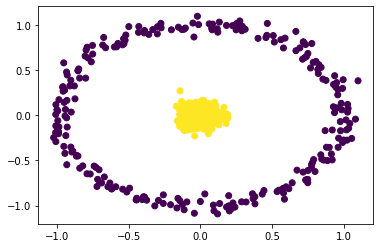

In [ ]:
X, y = make_circles(500, factor=0.1, noise=0.05)
y = y.reshape(500, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
class NeuralNet():
  def __init__(self, n_inputs=2, n_hidden=[4, 8, 4], n_outputs=1):
    self.n_inputs = n_inputs
    self.n_hidden = n_hidden
    self.n_outputs = n_outputs
    layers = [n_inputs] + n_hidden + [n_outputs]
    self.layers = layers

    # inicializar pesos y matrices de derivadas
    weights = []
    derivatives = []
    for i in range(len(layers) - 1):
      w = np.random.normal(scale=0.5, size=(layers[i], layers[i + 1]))
      d = np.zeros((layers[i], layers[i + 1]))
      weights.append(w)
      derivatives.append(d)
    self.weights = weights
    self.derivatives = derivatives

    # inicializar activaciones
    activations = []
    for i in range(len(layers)):
      a = np.zeros((1, layers[i]))
      activations.append(a)
    self.activations = activations

  def forward(self, inputs):
    self.activations[0] = inputs
    z = np.dot(inputs, self.weights[0])
    a = self.sigmoid(z)
    self.activations[1] = a
    for i in range(len(self.layers) - 2):
      z = np.dot(a, self.weights[i + 1])
      a = self.sigmoid(z)
      self.activations[i + 2] = a
    return self.activations[-1]

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_der(self, x):
    return x * (1 - x)

  def mse(self, output, target):
    return np.mean((output - target) ** 2) / 2

In [ ]:
nn = NeuralNet(2, [4, 8, 4], 1)
nn.forward(X)